In [1]:
# having_IP_Address  { -1,1 }
# URL_Length   { 1,0,-1 }
# Shortining_Service { 1,-1 }
# having_At_Symbol   { 1,-1 }
# double_slash_redirecting { -1,1 }
# Prefix_Suffix  { -1,1 }
# having_Sub_Domain  { -1,0,1 }
# SSLfinal_State  { -1,1,0 }
# Domain_registeration_length { -1,1 }
# Favicon { 1,-1 }
# port { 1,-1 }
# HTTPS_token { -1,1 }
# Request_URL  { 1,-1 }
# URL_of_Anchor { -1,0,1 }
# Links_in_tags { 1,-1,0 }
# SFH  { -1,1,0 }
# Submitting_to_email { -1,1 }
# Abnormal_URL { -1,1 }
# Redirect  { 0,1 }
# on_mouseover  { 1,-1 }
# RightClick  { 1,-1 }
# popUpWidnow  { 1,-1 }
# Iframe { 1,-1 }
# age_of_domain  { -1,1 }
# DNSRecord   { -1,1 }
# web_traffic  { -1,0,1 }
# Page_Rank { -1,1 }
# Google_Index { 1,-1 }
# Links_pointing_to_page { 1,0,-1 }
# Statistical_report { -1,1 }
# Result  { -1,1 }

from pyspark.sql import SQLContext
from pyspark.sql.types import *

sqlContext = SQLContext(sc)

schema = StructType([StructField('having_ip_address', DoubleType(), True),
                     StructField('url_length', DoubleType(), True),
                     StructField('shortining_service', DoubleType(), True),
                     StructField('having_at_symbol', DoubleType(), True),
                     StructField('double_slash_redirecting', DoubleType(), True),
                     StructField('prefix_suffix', DoubleType(), True),
                     StructField('having_sub_domain', DoubleType(), True),
                     StructField('ssl_final_state', DoubleType(), True),
                     StructField('domain_registration_length', DoubleType(), True),
                     StructField('favicon', DoubleType(), True),
                     StructField('port', DoubleType(), True),
                     StructField('https_token', DoubleType(), True),
                     StructField('request_url', DoubleType(), True),
                     StructField('url_of_anchor', DoubleType(), True),
                     StructField('links_in_tags', DoubleType(), True),
                     StructField('sfh', DoubleType(), True),
                     StructField('submiting_to_email', DoubleType(), True),
                     StructField('abnormal_url', DoubleType(), True),
                     StructField('redirect', DoubleType(), True),
                     StructField('on_mausover', DoubleType(), True),
                     StructField('right_click', DoubleType(), True),
                     StructField('pop_up_window', DoubleType(), True),
                     StructField('iframe', DoubleType(), True),
                     StructField('age_of_domain', DoubleType(), True),
                     StructField('dns_record', DoubleType(), True),
                     StructField('web_traffic', DoubleType(), True),
                     StructField('page_rank', DoubleType(), True),
                     StructField('google_index', DoubleType(), True),
                     StructField('links_pointing_to_page', DoubleType(), True),
                     StructField('statistical_report', DoubleType(), True),
                     StructField('label', DoubleType(), True)])



df = sqlContext.read.format('csv').load('phishing_data.txt', schema = schema, sep = ',')


from pyspark.sql import functions as F
df = df.withColumn('label',
    F.when(df['label']== -1.0, 0.0).
    otherwise(1.0))

print(df.count())
df.take(1)

11055


[Row(having_ip_address=-1.0, url_length=1.0, shortining_service=1.0, having_at_symbol=1.0, double_slash_redirecting=-1.0, prefix_suffix=-1.0, having_sub_domain=-1.0, ssl_final_state=-1.0, domain_registration_length=-1.0, favicon=1.0, port=1.0, https_token=-1.0, request_url=1.0, url_of_anchor=-1.0, links_in_tags=1.0, sfh=-1.0, submiting_to_email=-1.0, abnormal_url=-1.0, redirect=0.0, on_mausover=1.0, right_click=1.0, pop_up_window=1.0, iframe=1.0, age_of_domain=-1.0, dns_record=-1.0, web_traffic=-1.0, page_rank=-1.0, google_index=1.0, links_pointing_to_page=1.0, statistical_report=-1.0, label=0.0)]

In [2]:
sample_data = df.sample(False, 1.0).toPandas()
sample_data.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,ssl_final_state,domain_registration_length,favicon,...,pop_up_window,iframe,age_of_domain,dns_record,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,label
0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,0.0
3,1.0,0.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,0.0
4,1.0,0.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,1.0


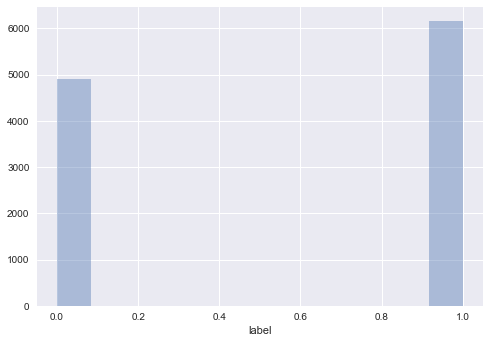

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb


sb.distplot(sample_data['label'], kde=False)
plt.show()

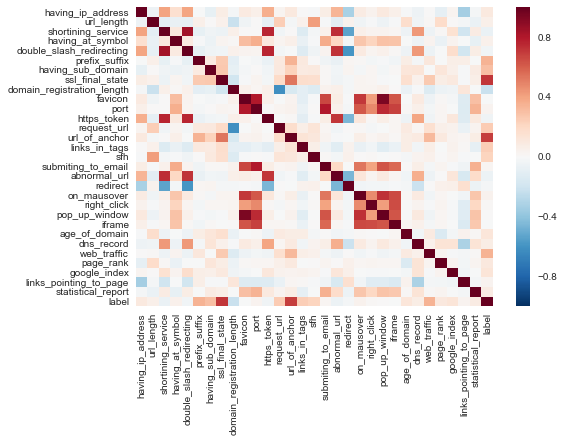

In [4]:
import gc

corr = sample_data.corr()
sb.heatmap(corr)
plt.show()

In [6]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

#print(sample_data.columns.values.tolist())

names = ['having_ip_address', 'url_length', 'shortining_service', 'having_at_symbol', 'double_slash_redirecting',
         'prefix_suffix', 'having_sub_domain', 'ssl_final_state', 'domain_registration_length', 'favicon', 'port',
         'https_token', 'request_url', 'url_of_anchor', 'links_in_tags', 'sfh', 'submiting_to_email', 'abnormal_url',
         'redirect', 'on_mausover', 'right_click', 'pop_up_window', 'iframe', 'age_of_domain', 'dns_record', 'web_traffic',
         'page_rank', 'google_index', 'links_pointing_to_page', 'statistical_report']

names.remove('abnormal_url') # corr 1
names.remove('https_token') # corr 2
names.remove('favicon')  # corr 3
names.remove('port')  # corr 4

print(len(names))

assembler = VectorAssembler(inputCols = names, outputCol = 'features')

26


In [7]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import LinearSVC


(train, test) = df.randomSplit([0.8, 0.2])

In [8]:
# labelCol  Double "label" -  Label to predict
# features ColVector "features" -  Feature vector

classifier = RandomForestClassifier(labelCol = 'label', featuresCol = 'features')
#classifier = DecisionTreeClassifier(labelCol = 'label', featuresCol = 'features')
#classifier = GBTClassifier(labelCol = 'label', featuresCol = 'features')
#classifier = LinearSVC(labelCol = 'label', featuresCol = 'features')


pipeline = Pipeline(stages = [assembler, classifier])



model = pipeline.fit(train)


from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions = model.transform(test)
evaluator = BinaryClassificationEvaluator(labelCol = 'label')
print(evaluator.evaluate(predictions))

auroc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
aupr = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print("The AUROC is %s and the AUPR is %s." % (auroc, aupr))


0.9847258227005067
The AUROC is 0.9847258227005067 and the AUPR is 0.9865723270540969.


In [11]:
predictions.select('label', 'prediction').toPandas().head(250)

,label,prediction
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [14]:
# sklearn decision tree visualisation
    
import numpy as np
from sklearn import tree

X = np.array(sample_data.drop(['label'], 1))
y = np.array(sample_data['label'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)


clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Accuracy: ', accuracy)

feature_names = sample_data.columns.values.tolist()
feature_names.remove('label')


# decision tree visualisation 
# (http://graphviz.org/Download_windows.php)
from sklearn.externals.six import StringIO
import pydotplus #  (pip install pydotplus - anaconda install)
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data, feature_names = feature_names, class_names = ['phishing', 'not_phishing'], filled = True, rounded = True, impurity = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("sklearn_decision_tree_website_phishing.pdf")


Accuracy:  0.965174129353


True